# Historical Flight Data in Malaysia from October 2018 - November 2018

Author: Nirta Ika Yunita
<br> Date: October 4, 2019

## Load Package

In [1]:
import numpy as np # math calculation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plot visualization
import seaborn as sns # visualization
import datetime # package for extract time
import calendar

## Load Train Dataset

Data that will be used for regression analysis is training_dataset.csv.

In [2]:
train = pd.read_csv('training_dataset.csv')

In [3]:
train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [4]:
train.shape

(111068, 26)

In [5]:
train.dtypes

id                             int64
number                        object
airline                       object
airline_name                  object
scheduled_departure_time      object
scheduled_arrival_time        object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
dtype: object

In [6]:
train.info()

# please check if the type is suit for our needs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [7]:
train.describe()

,id,delay
count,111068.000000,111068.000000
mean,202365.798475,11.540210
std,149258.072773,26.806913
min,1.000000,0.000000
25%,61496.750000,0.000000
50%,189313.500000,1.000000
75%,329683.250000,13.000000
max,496596.000000,978.000000


In [8]:
# from the train data (after we check one by one), we decide some features that will be used are:
# - airline
# - airline_name
# - scheduled_departure_time
# - scheduled_arrival_time
# - departure_airport_city
# - departure_airport_name
# - delay

train1 = train[['airline', 'airline_name', 'scheduled_departure_time', 'scheduled_arrival_time',
                'departure_airport_city', 'departure_airport_name', 'delay']].copy()

In [9]:
# Convert type of scheduled_departure_time and scheduled_arrival_time to datetime

train1['scheduled_departure_time'] = pd.to_datetime(train1['scheduled_departure_time'])
train1['scheduled_arrival_time'] = pd.to_datetime(train1['scheduled_arrival_time'])

In [10]:
train1.isnull().sum()

airline                     0
airline_name                0
scheduled_departure_time    0
scheduled_arrival_time      5
departure_airport_city      0
departure_airport_name      0
delay                       0
dtype: int64

In [11]:
# clean null
# find rows where 'scheduled_arrival_time' is null
print(train1[train1['scheduled_arrival_time'].isnull()])

       airline     airline_name scheduled_departure_time  \
8167        CX   Cathay Pacific      2018-10-09 12:45:00   
8168        KA    Cathay Dragon      2018-10-09 12:45:00   
38176       VI      Volga-Dnepr      2018-10-25 23:00:00   
100795      NZ  Air New Zealand      2018-11-26 04:00:00   
100798      NZ  Air New Zealand      2018-11-26 04:00:00   

       scheduled_arrival_time departure_airport_city  \
8167                      NaT           Kuala Lumpur   
8168                      NaT           Kuala Lumpur   
38176                     NaT           Kuala Lumpur   
100795                    NaT           Kuala Lumpur   
100798                    NaT           Kuala Lumpur   

                    departure_airport_name  delay  
8167    Kuala Lumpur International Airport     32  
8168    Kuala Lumpur International Airport     32  
38176   Kuala Lumpur International Airport     10  
100795  Kuala Lumpur International Airport      0  
100798  Kuala Lumpur International Airport

**We know that all null flight_duration (3 rows) have null scheduled_arrival_time. We decide to drop all rows with null scheduled_arrival_time (5 rows).**

In [12]:
train1 = train1.dropna(axis = 0, how ='any')

In [13]:
train1.head()

,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,delay
0,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,Kuala Lumpur International Airport,2
1,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8
2,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8
3,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,Kuala Lumpur International Airport,0
4,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,Kuala Lumpur International Airport,0


In [14]:
train1.shape

(111063, 7)

In [15]:
train1.dtypes

airline                             object
airline_name                        object
scheduled_departure_time    datetime64[ns]
scheduled_arrival_time      datetime64[ns]
departure_airport_city              object
departure_airport_name              object
delay                                int64
dtype: object

In [16]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111063 entries, 0 to 111067
Data columns (total 7 columns):
airline                     111063 non-null object
airline_name                111063 non-null object
scheduled_departure_time    111063 non-null datetime64[ns]
scheduled_arrival_time      111063 non-null datetime64[ns]
departure_airport_city      111063 non-null object
departure_airport_name      111063 non-null object
delay                       111063 non-null int64
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.8+ MB


In [17]:
train1.describe()

,delay
count,111063.000000
mean,11.540063
std,26.807331
min,0.000000
25%,0.000000
50%,1.000000
75%,13.000000
max,978.000000


## Feature Engineering

In [18]:
# # Just in case, departure_month will affect delay time. In peak season (like christmas) will delay get longer?
# train1['departure_month'] = train1.scheduled_departure_time.apply(lambda x: x.month)
# train1['departure_month'] = train1['departure_month'].apply(lambda x: calendar.month_abbr[x])

# Just in case, departure_day will affect delay time. In weekend will delay get longer?
train1['departure_day'] = train1.scheduled_departure_time.dt.weekday_name

# Just in case, departure_hour will affect delay time. We will use this feature for recommendation to passenges.
train1['departure_hour'] = train1.scheduled_departure_time.apply(lambda x: x.hour)

# # Just in case, arrival_month will affect delay time. In peak season (like christmas) will delay get longer?
# train1['arrival_month'] = train1.scheduled_arrival_time.apply(lambda x: x.month)
# train1['arrival_month'] = train1['arrival_month'].apply(lambda x: calendar.month_abbr[x])

# Just in case, arrival_day will affect delay time. In weekend will delay get longer?
train1['arrival_day'] = train1.scheduled_arrival_time.dt.weekday_name

# Just in case, arrival_hour will affect delay time. Will it affect delay time?
train1['arrival_hour'] = train1.scheduled_arrival_time.apply(lambda x: x.hour)

train1.head()

,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,delay,departure_day,departure_hour,arrival_day,arrival_hour
0,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,Kuala Lumpur International Airport,2,Friday,22,Friday,23
1,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
2,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
3,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1
4,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1


In [19]:
train1.shape

(111063, 11)

In [20]:
train1.dtypes

airline                             object
airline_name                        object
scheduled_departure_time    datetime64[ns]
scheduled_arrival_time      datetime64[ns]
departure_airport_city              object
departure_airport_name              object
delay                                int64
departure_day                       object
departure_hour                       int64
arrival_day                         object
arrival_hour                         int64
dtype: object

In [21]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111063 entries, 0 to 111067
Data columns (total 11 columns):
airline                     111063 non-null object
airline_name                111063 non-null object
scheduled_departure_time    111063 non-null datetime64[ns]
scheduled_arrival_time      111063 non-null datetime64[ns]
departure_airport_city      111063 non-null object
departure_airport_name      111063 non-null object
delay                       111063 non-null int64
departure_day               111063 non-null object
departure_hour              111063 non-null int64
arrival_day                 111063 non-null object
arrival_hour                111063 non-null int64
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 10.2+ MB


In [22]:
train1.describe()

,delay,departure_hour,arrival_hour
count,111063.000000,111063.000000,111063.000000
mean,11.540063,8.586919,9.016495
std,26.807331,6.313133,5.776410
min,0.000000,0.000000,0.000000
25%,0.000000,4.000000,4.000000
50%,1.000000,8.000000,9.000000
75%,13.000000,12.000000,13.000000
max,978.000000,23.000000,23.000000


## Correlation Plot

In [23]:
corr = train1.corr()
corr

,delay,departure_hour,arrival_hour
delay,1.000000,-0.007581,0.073419
departure_hour,-0.007581,1.000000,0.464271
arrival_hour,0.073419,0.464271,1.000000


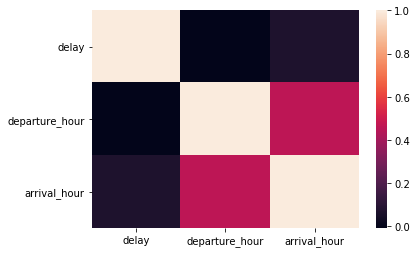

In [24]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

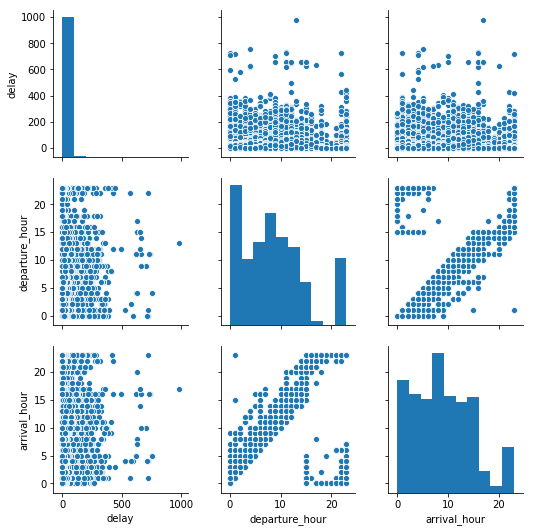

In [25]:
sns.pairplot(train1)

## Recommendation to Passengers

### Best time to take a flight

Best time to take a flight is time where the sum of delay is lower than anyother time.

In [26]:
df = train1.copy()
df.head()

,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,delay,departure_day,departure_hour,arrival_day,arrival_hour
0,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,Kuala Lumpur International Airport,2,Friday,22,Friday,23
1,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
2,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
3,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1
4,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1


In [27]:
group_time = df[['departure_hour', 'delay']].groupby(by='departure_hour').mean().round(2).sort_values(by =['departure_hour'])

group_time

,delay
departure_hour,
0,8.97
1,10.08
2,8.01
3,11.17
4,10.75
5,10.04
6,10.08
7,11.54
8,13.27


Best 3 time to take a flight with mean delay is lower than any other time are

                delay
departure_hour       
21               2.25
22               3.08
23               5.80


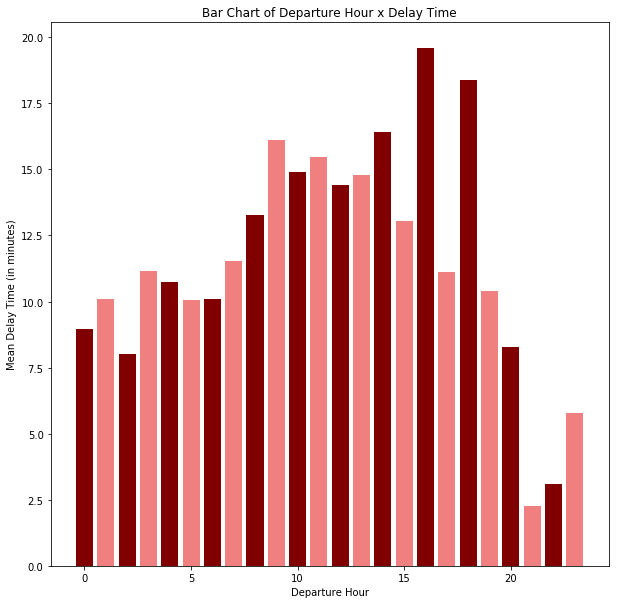

In [28]:
print('Best 3 time to take a flight with mean delay is lower than any other time are\n')
print(group_time.sort_values(by =['delay']).head(3))


# figure size
plt.figure(figsize = (10, 10))

# x-coordinates of bars   
x = group_time.index
  
# y-coordinates of bars 
y = group_time['delay'] 
  
# plotting a bar chart 
plt.bar(x, y, width = 0.8, color = ['maroon', 'lightcoral']) 
  
# naming the x-axis 
plt.xlabel('Departure Hour') 
# naming the y-axis 
plt.ylabel('Mean Delay Time (in minutes)') 
# plot title 
plt.title('Bar Chart of Departure Hour x Delay Time') 

# function to show the plot 
plt.show() 

### Best airline to take a flight

Best airline to take a flight is where the sum of delay is lowest.

In [29]:
df = train1.copy()
df.head()

,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,delay,departure_day,departure_hour,arrival_day,arrival_hour
0,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,Kuala Lumpur International Airport,2,Friday,22,Friday,23
1,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
2,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
3,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1
4,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1


In [30]:
group_airline = df[['airline_name', 'delay']].groupby(by='airline_name').mean().round(2).sort_values(by =['airline_name'])

group_airline

,delay
airline_name,
AHK,9.00
ANA,5.82
Air Astana,24.64
Air Canada,6.99
Air China,19.60
...,...
Virgin Australia,15.98
Wings Air (Indonesia),12.51
Xiamen Airlines,11.78


Best airlines with 0 delay time to take a flight are

                             delay
airline_name                      
Firefly                        0.0
Guangxi Beibu Gulf Airlines    0.0
Hong Kong Airlines             0.0
Silk Way West                  0.0
YTO Cargo                      0.0


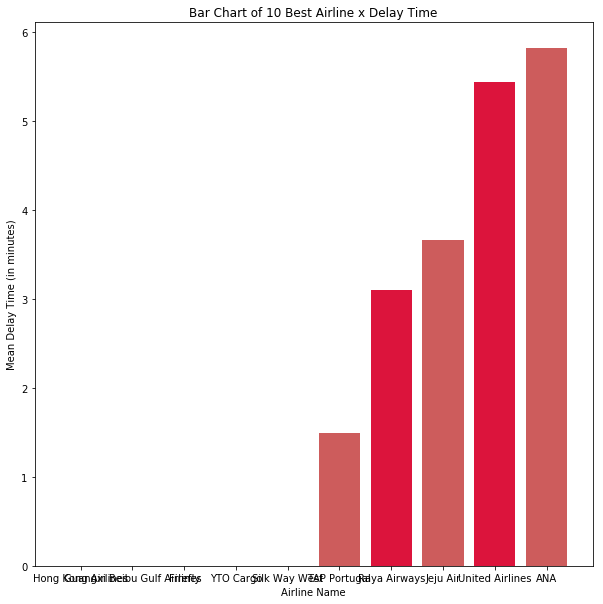

In [31]:
print('Best airlines with 0 delay time to take a flight are\n')
print(group_airline[group_airline.delay == 0])

best_airline = group_airline.sort_values(by =['delay']).head(10)

# figure size
plt.figure(figsize = (10, 10))

# x-coordinates of bars   
x = best_airline.index
  
# y-coordinates of bars 
y = best_airline['delay'] 
  
# plotting a bar chart 
plt.bar(x, y, width = 0.8, color = ['crimson', 'indianred']) 
  
# naming the x-axis 
plt.xlabel('Airline Name') 
# naming the y-axis 
plt.ylabel('Mean Delay Time (in minutes)') 
# plot title 
plt.title('Bar Chart of 10 Best Airline x Delay Time') 

# function to show the plot 
plt.show() 

### Best time and best airline to take a flight

In [32]:
df = train1.copy()
df.head()

,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,delay,departure_day,departure_hour,arrival_day,arrival_hour
0,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,Kuala Lumpur International Airport,2,Friday,22,Friday,23
1,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
2,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,Kuala Lumpur International Airport,8,Friday,22,Friday,23
3,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1
4,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,Kuala Lumpur International Airport,0,Friday,22,Saturday,1


In [33]:
group_time_airline = df[['departure_hour', 'airline_name', 'delay']]
group_time_airline = group_time_airline.groupby(['departure_hour', 'airline_name']).mean().round(2).sort_values(by =['departure_hour', 'airline_name'])

group_time_airline

delay
departure_hour airline_name             
0              ANA                  5.85
               Air Canada           6.99
               Air India            3.12
               Air New Zealand     14.42
               AirAsia              6.09
...                                  ...
23             SilkAir             12.13
               Singapore Airlines  12.13
               United Airlines      3.96
               Virgin Australia    12.13
               Xiamen Airlines      6.71

[676 rows x 1 columns]

In [34]:
print('Best airlines with minimum mean delay time to take a flight per hour are listed below:')

time = []
planes = []
delays = []

for i in range(24):
    time.append(i)
    
    plane = group_time_airline.loc[i].idxmin()["delay"]
    planes.append(plane)
    
    delay = group_time_airline.loc[i].min()["delay"]
    delays.append(delay)
    
    
pd.DataFrame({"departure_hour": time, "airline_name": planes, "mean delay in minute(s)": delays})

Best airlines with minimum mean delay time to take a flight per hour are listed below:


,departure_hour,airline_name,mean delay in minute(s)
0,0,Firefly,0.00
1,1,Firefly,0.00
2,2,Firefly,0.00
3,3,Firefly,0.00
4,4,Firefly,0.00
5,5,Firefly,0.00
6,6,Firefly,0.00
7,7,Firefly,0.00
8,8,Firefly,0.00
9,9,Firefly,0.00


## Load and Clean Test Dataset

Data that will be the test dataset is test_dataset.csv.

In [70]:
test = pd.read_csv('test_dataset.csv')

In [71]:
test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,...,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20


In [72]:
test.shape

(41557, 26)

In [38]:
test.dtypes

id                             int64
number                        object
airline                       object
airline_name                  object
scheduled_departure_time      object
scheduled_arrival_time        object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
dtype: object

In [39]:
test.info()

# please check if the type is suit for our needs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41557 entries, 0 to 41556
Data columns (total 26 columns):
id                            41557 non-null int64
number                        41557 non-null object
airline                       41557 non-null object
airline_name                  41557 non-null object
scheduled_departure_time      41557 non-null object
scheduled_arrival_time        41555 non-null object
departure_airport_city        41557 non-null object
departure_airport_code        41557 non-null object
departure_airport_country     41557 non-null object
departure_airport_gate        25147 non-null object
departure_airport_name        41557 non-null object
departure_airport_region      41557 non-null object
departure_airport_terminal    26309 non-null object
departure_airport_timezone    41557 non-null object
arrival_airport_city          41557 non-null object
arrival_airport_code          41557 non-null object
arrival_airport_country       41557 non-null object
arrival_

In [40]:
test.describe()

,id,delay
count,41557.000000,41557.000000
mean,594559.814255,17.367447
std,65697.780915,31.157943
min,483244.000000,0.000000
25%,540734.000000,0.000000
50%,598120.000000,7.000000
75%,655374.000000,23.000000
max,708033.000000,800.000000


In [41]:
# from the test data, we include features that are used in train data. They are:
# - airline
# - airline_name
# - scheduled_departure_time
# - scheduled_arrival_time
# - departure_airport_city
# - departure_airport_name
# - delay

test1 = test[['airline', 'airline_name', 'scheduled_departure_time', 'scheduled_arrival_time',
              'departure_airport_city', 'departure_airport_name', 'delay']].copy()

In [42]:
# Convert type of scheduled_departure_time and scheduled_arrival_time to datetime

test1['scheduled_departure_time'] = pd.to_datetime(test1['scheduled_departure_time'])
test1['scheduled_arrival_time'] = pd.to_datetime(test1['scheduled_arrival_time'])

In [43]:
test1.isnull().sum()

airline                     0
airline_name                0
scheduled_departure_time    0
scheduled_arrival_time      2
departure_airport_city      0
departure_airport_name      0
delay                       0
dtype: int64

In [44]:
# clean null
# find rows where 'scheduled_arrival_time' is null
print(test1[test1['scheduled_arrival_time'].isnull()])

    airline     airline_name scheduled_departure_time scheduled_arrival_time  \
328      NZ  Air New Zealand      2018-12-01 04:00:00                    NaT   
330      NZ  Air New Zealand      2018-12-01 04:00:00                    NaT   

    departure_airport_city              departure_airport_name  delay  
328           Kuala Lumpur  Kuala Lumpur International Airport      0  
330           Kuala Lumpur  Kuala Lumpur International Airport      0  


**We know that all null flight_duration (2 rows) have null scheduled_arrival_time. We decide to drop all rows with null scheduled_arrival_time (2 rows).**

In [45]:
test1 = test1.dropna(axis = 0, how ='any')

In [46]:
# # Just in case, departure_month will affect delay time. In peak season (like christmas) will delay get longer?
# test1['departure_month'] = test1.scheduled_departure_time.apply(lambda x: x.month)
# test1['departure_month'] = test1['departure_month'].apply(lambda x: calendar.month_abbr[x])

# Just in case, departure_day will affect delay time. In weekend will delay get longer?
test1['departure_day'] = test1.scheduled_departure_time.dt.weekday_name

# Just in case, departure_hour will affect delay time. We will use this feature for recommendation to passenges.
test1['departure_hour'] = test1.scheduled_departure_time.apply(lambda x: x.hour)

# # Just in case, arrival_month will affect delay time. In peak season (like christmas) will delay get longer?
# test1['arrival_month'] = test1.scheduled_arrival_time.apply(lambda x: x.month)
# test1['arrival_month'] = test1['arrival_month'].apply(lambda x: calendar.month_abbr[x])

# Just in case, arrival_day will affect delay time. In weekend will delay get longer?
test1['arrival_day'] = test1.scheduled_arrival_time.dt.weekday_name

# Just in case, arrival_hour will affect delay time. Will it affect delay time?
test1['arrival_hour'] = test1.scheduled_arrival_time.apply(lambda x: x.hour)

test1.head()

,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_name,delay,departure_day,departure_hour,arrival_day,arrival_hour
0,CZ,China Southern Airlines,2018-12-01,2018-12-01 04:40:00,Kuala Lumpur,Kuala Lumpur International Airport,15,Saturday,0,Saturday,4
1,MH,Malaysia Airlines,2018-12-01,2018-12-01 04:40:00,Kuala Lumpur,Kuala Lumpur International Airport,15,Saturday,0,Saturday,4
2,TK,Turkish Airlines,2018-12-01,2018-12-01 02:40:00,Kuala Lumpur,Kuala Lumpur International Airport,27,Saturday,0,Saturday,2
3,AK,AirAsia,2018-12-01,2018-12-01 01:05:00,Kuala Lumpur,Kuala Lumpur International Airport,95,Saturday,0,Saturday,1
4,UA,United Airlines,2018-12-01,2018-12-01 06:40:00,Kuala Lumpur,Kuala Lumpur International Airport,20,Saturday,0,Saturday,6


In [47]:
test1.shape

(41555, 11)

In [48]:
test1.dtypes

airline                             object
airline_name                        object
scheduled_departure_time    datetime64[ns]
scheduled_arrival_time      datetime64[ns]
departure_airport_city              object
departure_airport_name              object
delay                                int64
departure_day                       object
departure_hour                       int64
arrival_day                         object
arrival_hour                         int64
dtype: object

In [49]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41555 entries, 0 to 41556
Data columns (total 11 columns):
airline                     41555 non-null object
airline_name                41555 non-null object
scheduled_departure_time    41555 non-null datetime64[ns]
scheduled_arrival_time      41555 non-null datetime64[ns]
departure_airport_city      41555 non-null object
departure_airport_name      41555 non-null object
delay                       41555 non-null int64
departure_day               41555 non-null object
departure_hour              41555 non-null int64
arrival_day                 41555 non-null object
arrival_hour                41555 non-null int64
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 3.8+ MB


In [50]:
test1.describe()

,delay,departure_hour,arrival_hour
count,41555.000000,41555.000000,41555.000000
mean,17.368283,8.405848,9.030201
std,31.158459,6.189162,5.734074
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,4.000000
50%,7.000000,8.000000,9.000000
75%,23.000000,12.000000,13.000000
max,800.000000,23.000000,23.000000


## Multivariate Regression

A model to estimate the delay duration.

### OneHotEncoder

In [51]:
train2 = train1[['airline', 'departure_airport_name', 'departure_day', 'departure_hour', 'arrival_hour', 'delay']].copy()
test2 = test1[['airline', 'departure_airport_name', 'departure_day', 'departure_hour', 'arrival_hour', 'delay']].copy()

In [52]:
mul_reg_train = train2.copy()
mul_reg_test = test2.copy()

In [53]:
target_train = mul_reg_train['delay']
temp_train = mul_reg_train.drop(['delay'], axis = 1)

target_test = mul_reg_test['delay']
temp_test= mul_reg_test.drop(['delay'], axis = 1)

In [54]:
from sklearn.preprocessing import OneHotEncoder

dummy_train = temp_train.select_dtypes(exclude = ['int', 'int64', 'float64'])
integer_train = temp_train.select_dtypes(include = ['int', 'int64', 'float64'])

dummy_test = temp_test.select_dtypes(exclude = ['int', 'int64', 'float64'])
integer_test = temp_test.select_dtypes(include = ['int', 'int64', 'float64'])

In [55]:
dummy2_train = pd.get_dummies(dummy_train, drop_first = True)

dummy2_test = pd.get_dummies(dummy_test, drop_first = True)

In [56]:
model_train = pd.concat([integer_train, dummy2_train, target_train], axis = 1)

model_test = pd.concat([integer_test, dummy2_test, target_test], axis = 1)

In [57]:
X_train = model_train.iloc[:, 0:len(model_train.columns)-1]
y_train = model_train.iloc[:, len(model_train.columns)-1]

X_test = model_test.iloc[:, 0:len(model_test.columns)-1]
y_test = model_test.iloc[:, len(model_test.columns)-1]

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

multi_regression = LinearRegression()
multi_regression.fit(X_train, y_train)

# y_pred_train = multi_regression.predict(X_train)
y_pred_test = multi_regression.predict(X_test)

print(
#     'mse train = {}'.format(mean_squared_error(y_pred_train, y_train)),
       'mse test = {}'. format(mean_squared_error(y_pred_test, y_test))
     )

# what we want: the mse train value and the mse test should be close 

ValueError: shapes (41555,124) and (125,) not aligned: 124 (dim 1) != 125 (dim 0)

### Using another library

In [77]:
import statsmodels.api as sm

D:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [78]:
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

# bagusnya R-squared mendekati 1

                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     236.4
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:27:46   Log-Likelihood:            -5.1917e+05
No. Observations:              111063   AIC:                         1.039e+06
Df Residuals:                  110938   BIC:                         1.040e+06
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [79]:
result.summary()

# misal alpha = 0.05
# jika nilai p value > alpha, maka  feature tersebut harus didrop

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delay   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     236.4
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:27:59   Log-Likelihood:            -5.1917e+05
No. Observations:              111063   AIC:                         1.039e+06
Df Residuals:                  110938   BIC:                         1.040e+06
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
departure_hour                                                -0.2196      0.014    -15.230      0.000      -0.248      -0.191
arrival_hour                                                   0.4844      0.016     30.115      0.000       0.453       0.516
airline_5J                                                    14.8067      4.524      3.273      0.001       5.939      23.674
airline_6E                                                    12.0457      4.861      2.478      0.013       2.518      21.574
airline_7C*                                                   -1.5097      4.533     -0.333      0.739     -10.395       7.376
airline_7L*                                                    1.0738      7.026      0.153      0.879     -12.697      14.845
airline_8L                                                    12.6030      3.100      4.066      0.000       6.528      18.678
airline_8M                                                     4.8004      1.572      3.053      0.002       1.719       7.882
airline_9C                                                     6.1309      4.534      1.352      0.176      -2.756      15.017
airline_9W                                                     6.4234      1.327      4.839      0.000       3.822       9.025
airline_AA                                                     7.1060      1.545      4.600      0.000       4.078      10.134
airline_AC                                                     2.2944      1.981      1.158      0.247      -1.587       6.176
airline_AF                                                     7.3915      2.067      3.575      0.000       3.340      11.444
airline_AI                                                     1.0778      2.355      0.458      0.647      -3.538       5.694
airline_AK                                                    11.2610      1.098     10.255      0.000       9.109      13.413
airline_AY                                                     9.1451      1.530      5.977      0.000       6.146      12.144
airline_AZ                                                    15.0682      3.608      4.176      0.000       7.996      22.141
airline_BA                                                     2.8280      2.974      0.951      0.342      -3.001       8.657
airline_BG                                                    36.8992      4.525      8.154      0.000      28.030      45.769
airline_BI                                                     2.8877      1.380      2.093      0.036       0.184       5.592
airline_BR                                                    19.0906      3.244      5.884      0.000      12.732      25.450
airline_BS*                        

## Logistic Regression

A model to predict delay > 60 min.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = data.copy()

In [ ]:
target = log_reg['default']
temp = log_reg.drop(['default'], axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
dummy = temp.select_dtypes(exclude = ['int', 'int64', 'float64'])
integer = temp.select_dtypes(include = ['int', 'int64', 'float64'])

In [ ]:
dummy2 = pd.get_dummies(dummy, drop_first = True)

In [ ]:
model = pd.concat([integer, dummy2, target], axis = 1)

In [ ]:
X = model.iloc[:, 0:len(model.columns)-1]
y = model.iloc[:, len(model.columns)-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
SC = StandardScaler()

In [ ]:
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_test = logistic_regression.predict(X_test) # langsung keluar kelasnya, defaultnya 0.5
y_pred_train = logistic_regression.predict(X_train) # kalau predict proba akan keluar probability, bisa mengubah default

In [ ]:
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

In [ ]:
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, y_pred_test)

In [ ]:
print('AUC train = {}'.format(metrics.auc(fpr_train, tpr_train)))
print('AUC test = {}'.format(metrics.auc(fpr_test, tpr_test)))

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)
print(report)

In [ ]:
report = classification_report(y_train, y_pred_train)
print(report)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_train,tpr_train, color ='darkorange',
        lw=lw, label = 'ROC Curve (area =%0.2f)' %metrics.auc(fpr_train,tpr_train))
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_test,tpr_test, color ='darkorange',
        lw=lw, label = 'ROC Curve (area =%0.2f)' %metrics.auc(fpr_test,tpr_test))
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

A model to predict delay > 60 min.